### Load and Modify Configuration File

In [1]:
from configs.config_loader import load_config
config = load_config('configs/default.yaml')

version : default
seed : 1
x_domain : [-1, 1]
t_domain : [0, 1.0]
N_col : 1024
N_IC : 128
N_BC : 128
N_hidden : 6
N_neurons : 100
activation : tanh
N_epochs : 10000
learning_rate : 0.001
decay_rate : 1.0
freq_log : 10
freq_print : 100
keys_print : ['loss_data', 'loss_IC', 'loss_BC', 'loss_AC']


### Initialize Physics-Informed Neural Network

In [2]:
from model.neural_net import PhysicsInformedNN
PINN = PhysicsInformedNN(config, verbose=True)

Model: "PhysicsInformedNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)           

### Train Physics-Informed Neural Network

In [3]:
training_logs = PINN.train()

Training started...
    0/10000 | loss_IC: 1.58e-01 | loss_BC: 4.55e-02 | loss_AC: 3.17e-01
  100/10000 | loss_IC: 9.47e-02 | loss_BC: 1.31e-03 | loss_AC: 3.31e-01
  200/10000 | loss_IC: 9.64e-02 | loss_BC: 2.21e-03 | loss_AC: 4.42e-01
  300/10000 | loss_IC: 8.52e-02 | loss_BC: 5.19e-04 | loss_AC: 3.74e-01
  400/10000 | loss_IC: 9.69e-02 | loss_BC: 5.43e-03 | loss_AC: 3.20e-01
  500/10000 | loss_IC: 2.05e-02 | loss_BC: 3.69e-01 | loss_AC: 5.12e-01
  600/10000 | loss_IC: 5.62e-03 | loss_BC: 4.32e-01 | loss_AC: 5.50e-01
  700/10000 | loss_IC: 2.39e-03 | loss_BC: 2.27e-02 | loss_AC: 2.67e-01
  800/10000 | loss_IC: 7.65e-04 | loss_BC: 1.23e-02 | loss_AC: 1.45e-01
  900/10000 | loss_IC: 6.91e-04 | loss_BC: 8.64e-03 | loss_AC: 9.75e-02
 1000/10000 | loss_IC: 5.48e-04 | loss_BC: 3.68e-03 | loss_AC: 6.32e-02
 1100/10000 | loss_IC: 5.73e-04 | loss_BC: 6.98e-03 | loss_AC: 3.43e-02
 1200/10000 | loss_IC: 5.96e-04 | loss_BC: 1.40e-02 | loss_AC: 2.16e-02
 1300/10000 | loss_IC: 6.43e-04 | loss_BC: 1

# Plot Section

In [4]:
from model.plots import learning_curves, allen_cahn_mesh, allen_cahn_xcut

### Learning Curves

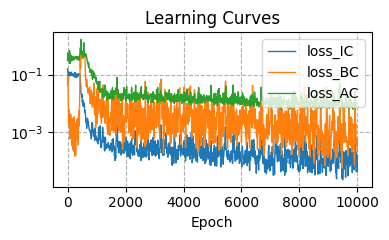

In [5]:
learning_curves(training_logs)

### Allen-Cahn Dynamics (Mesh)

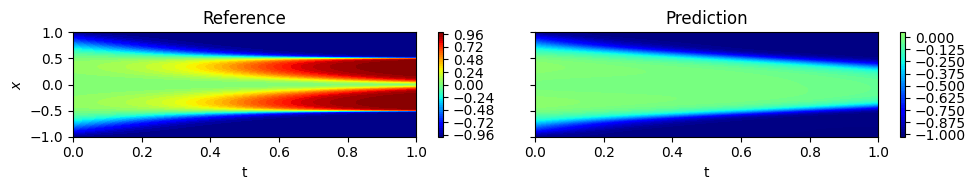

In [6]:
allen_cahn_mesh(PINN)

### Allen-Cahn Dynamics (x-Cut)

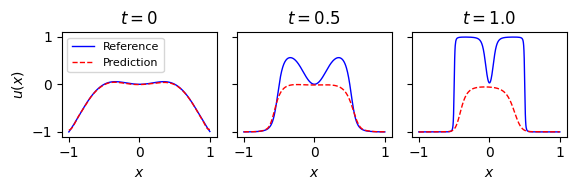

In [7]:
allen_cahn_xcut(PINN, time_steps=[0, 0.5, 1.0])